# 📊 Bitcoin Market Sentiment vs Trader Performance
Author: **anujnamdev**

### ✅ Objective
Explore the relationship between Bitcoin market sentiment (Fear-Greed Index) and trader performance using historical trade data.

### 📦 Step 1: Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### 📂 Step 2: Load Raw CSVs

In [4]:
# Mount Google Drive if using Colab (optional)
# from google.colab import drive
# drive.mount('/content/drive')

# Load raw data (adjust paths if needed)
trades_df = pd.read_csv("csv_files/historical_data.csv")
sentiment_df = pd.read_csv("csv_files/fear_greed_index.csv")

trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


### 🧹 Step 3: Clean and Format

In [5]:
# Convert timestamp to datetime
trades_df["date"] = pd.to_datetime(trades_df["Timestamp IST"], format="%d-%m-%Y %H:%M").dt.date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

# Convert important columns to numeric
trades_df["Closed PnL"] = pd.to_numeric(trades_df["Closed PnL"], errors='coerce')
trades_df["Size USD"] = pd.to_numeric(trades_df["Size USD"], errors='coerce')
trades_df["Fee"] = pd.to_numeric(trades_df["Fee"], errors='coerce')


### 🔗 Step 4: Merge Datasets

In [6]:
# Merge on date
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification']], on='date', how='left')
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


### 📊 Step 5: Grouped Analysis by Sentiment

In [7]:
summary = merged_df.groupby("classification").agg({
    "Closed PnL": ["mean", "sum"],
    "Size USD": "sum",
    "Fee": "sum"
})
summary.columns = ["Avg PnL", "Total PnL", "Total Volume (USD)", "Total Fees"]
summary.reset_index(inplace=True)
summary


,classification,Avg PnL,Total PnL,Total Volume (USD),Total Fees
0,Extreme Fear,34.537862,7.391102e+05,1.144843e+08,23888.633939
1,Extreme Greed,67.892861,2.715171e+06,1.244652e+08,27030.665465
2,Fear,54.290400,3.357155e+06,4.833248e+08,92456.948674
3,Greed,42.743559,2.150129e+06,2.885825e+08,63098.691979
4,Neutral,34.307718,1.292921e+06,1.802421e+08,39374.268304


### 📈 Step 6: Visualizations

C:\Users\Asus\AppData\Local\Temp\ipykernel_12656\208476698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="classification", y="Avg PnL", palette="coolwarm")


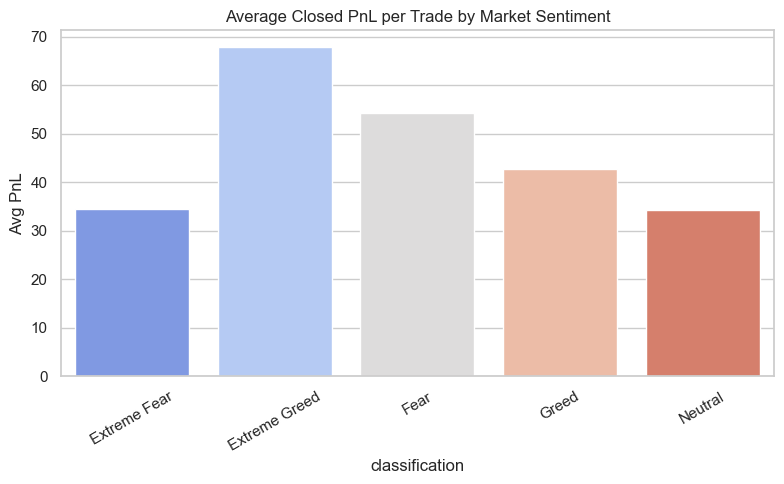

In [8]:
# Average PnL
plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x="classification", y="Avg PnL", palette="coolwarm")
plt.title("Average Closed PnL per Trade by Market Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12656\3899853168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="classification", y="Total Volume (USD)", palette="viridis")


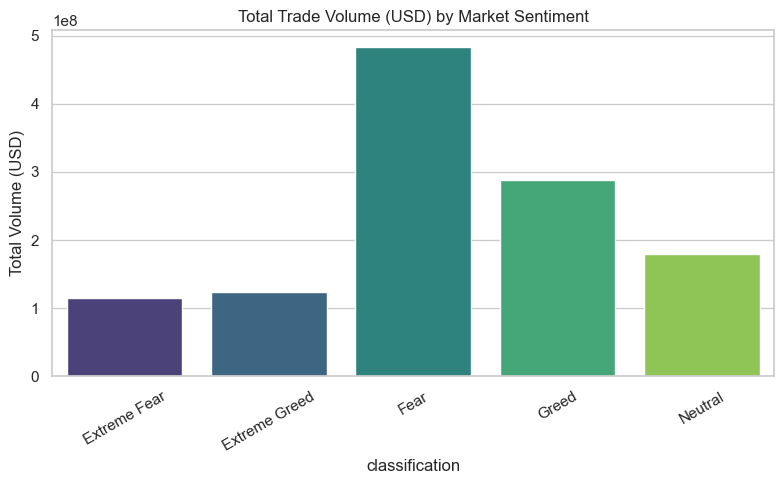

In [9]:
# Total Volume
plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x="classification", y="Total Volume (USD)", palette="viridis")
plt.title("Total Trade Volume (USD) by Market Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()


### 🧠 Step 7: Key Takeaways


- 'Fear' days show the **highest total PnL** and **highest trading volume**.
- 'Extreme Greed' yields **best average PnL per trade**.
- Sentiment data appears to influence both trading activity and profitability.


### 📉 Step 8: Market Sentiment Trends Over Time

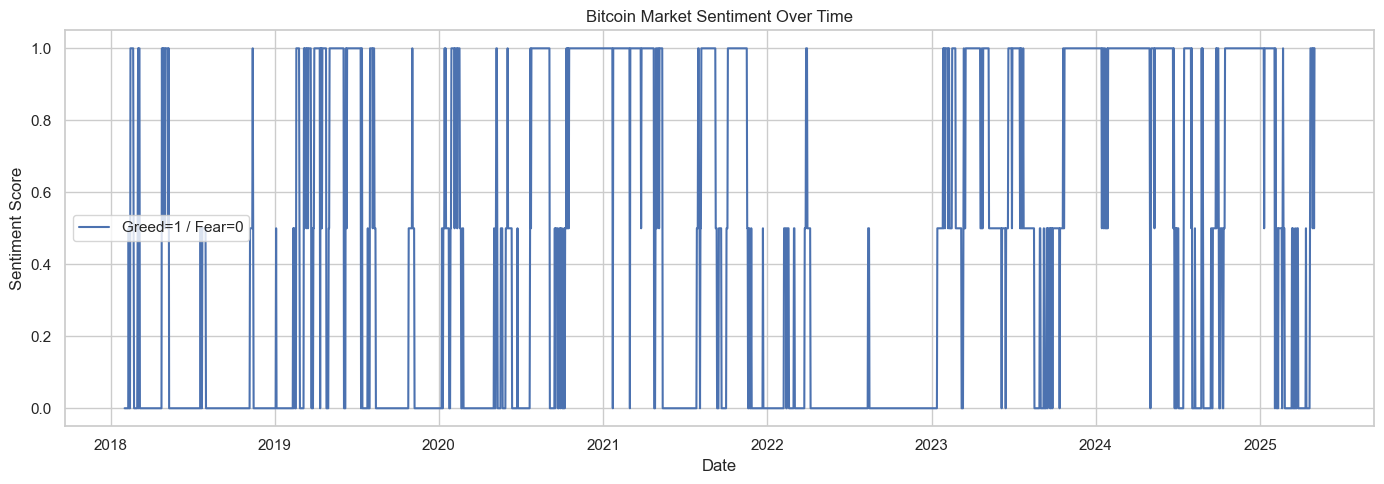

In [10]:
# Load cleaned sentiment data
sentiment_df = pd.read_csv("csv_files/fear_greed_index_clean.csv")
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

# Plot sentiment trend over time
plt.figure(figsize=(14, 5))
sns.lineplot(data=sentiment_df, x='date', y='sentiment_score', label='Greed=1 / Fear=0')
plt.title("Bitcoin Market Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/sentiment_trend.png")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12656\1788577743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sentiment, x='month', y='sentiment_score', palette="coolwarm")


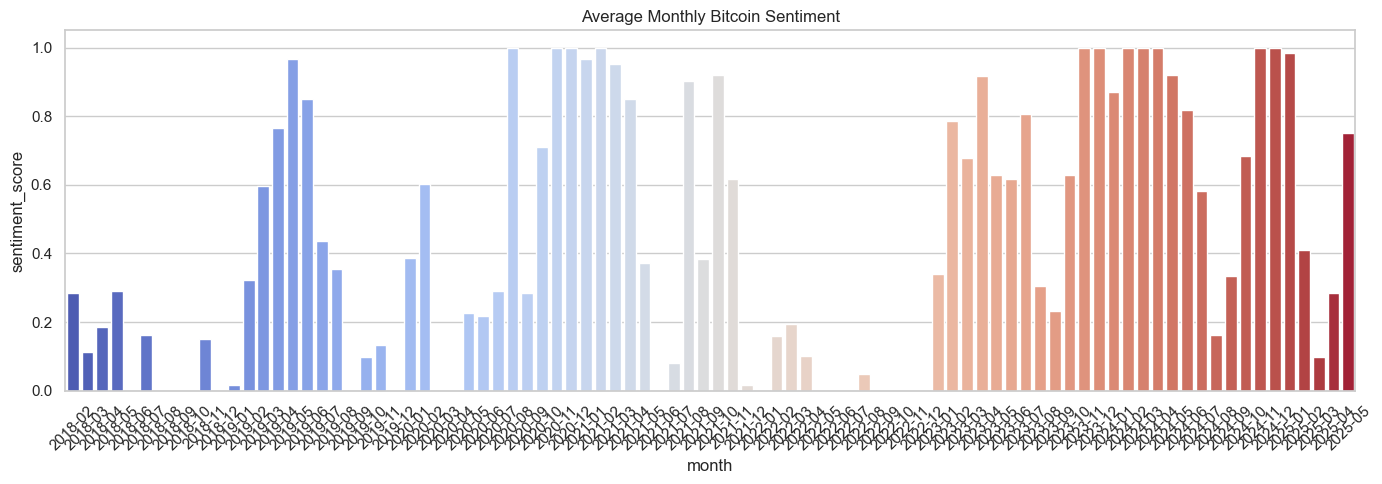

In [11]:
# Load monthly sentiment
monthly_sentiment = pd.read_csv("csv_files/monthly_sentiment.csv")

# Plot monthly average sentiment
plt.figure(figsize=(14, 5))
sns.barplot(data=monthly_sentiment, x='month', y='sentiment_score', palette="coolwarm")
plt.title("Average Monthly Bitcoin Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/monthly_sentiment.png")
plt.show()


These plots help understand how market sentiment evolves over time and identify seasonal or emotional trading behaviors.

### 📉 Step 8: Market Sentiment Trends Over Time (from merged data)

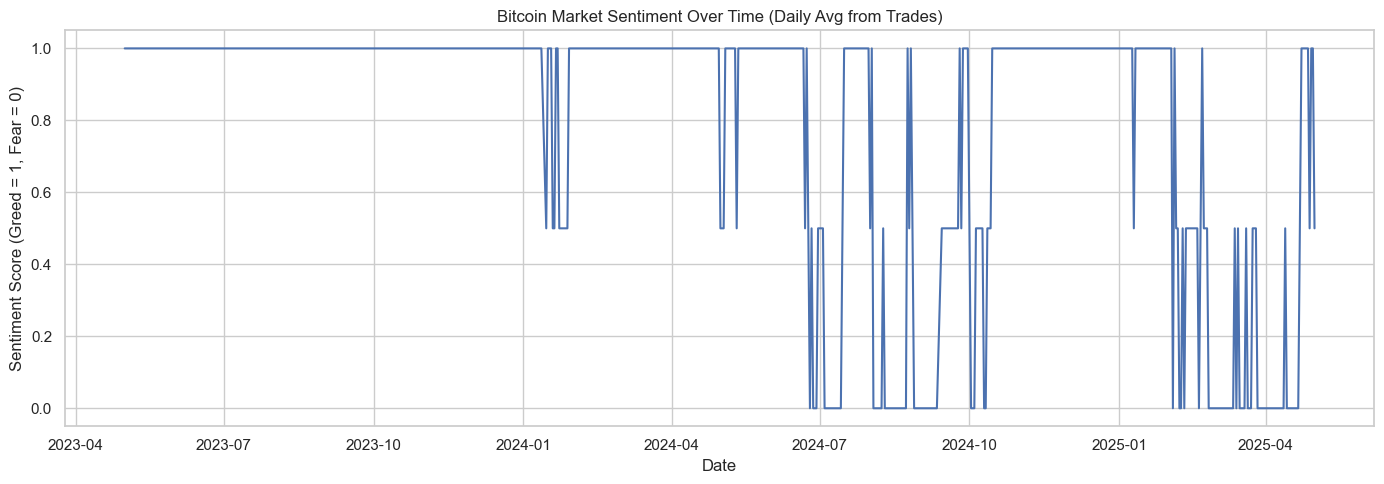

In [12]:
# Map sentiment to numeric score
sentiment_map = {
    "Extreme Fear": 0,
    "Fear": 0,
    "Neutral": 0.5,
    "Greed": 1,
    "Extreme Greed": 1
}
merged_df["sentiment_score"] = merged_df["classification"].map(sentiment_map)

# Plot sentiment score over time (daily average)
daily_sentiment = merged_df.groupby("date")["sentiment_score"].mean().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_sentiment, x='date', y='sentiment_score')
plt.title("Bitcoin Market Sentiment Over Time (Daily Avg from Trades)")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Greed = 1, Fear = 0)")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/sentiment_trend.png")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_12656\2319208360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sentiment, x='month', y='sentiment_score', palette="coolwarm")


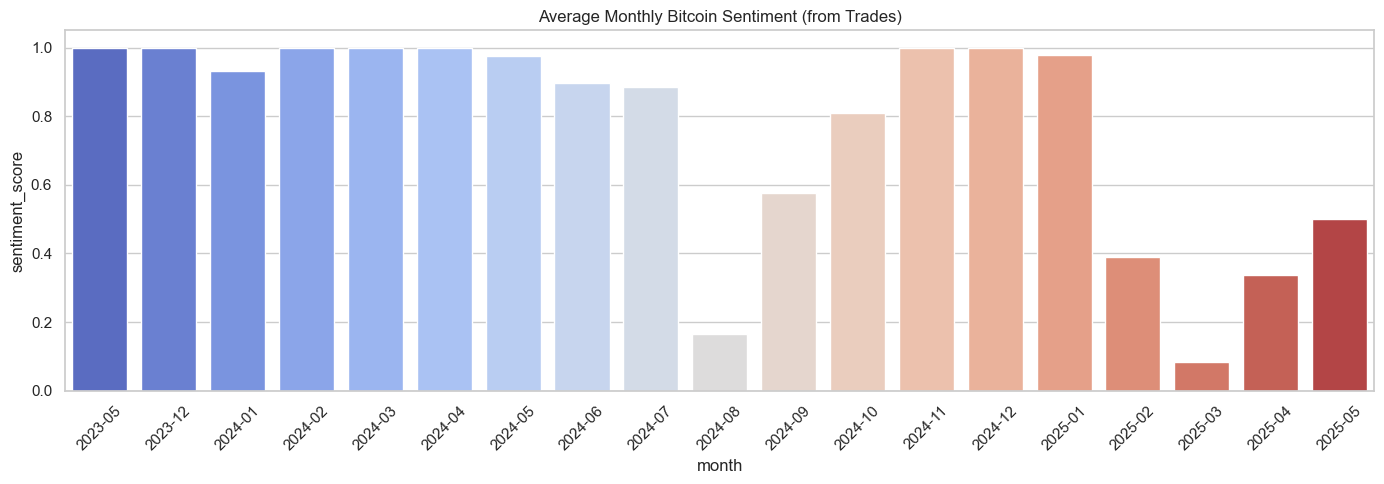

In [13]:
# Monthly average sentiment score
merged_df["month"] = pd.to_datetime(merged_df["date"]).dt.to_period("M").astype(str)
monthly_sentiment = merged_df.groupby("month")["sentiment_score"].mean().reset_index()

plt.figure(figsize=(14, 5))
sns.barplot(data=monthly_sentiment, x='month', y='sentiment_score', palette="coolwarm")
plt.title("Average Monthly Bitcoin Sentiment (from Trades)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/monthly_sentiment.png")
plt.show()
